In [3]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from os import path, listdir

C:\Users\rkiselev\Documents\dev\sm_particle_counter\venv\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\rkiselev\Documents\dev\sm_particle_counter\venv\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


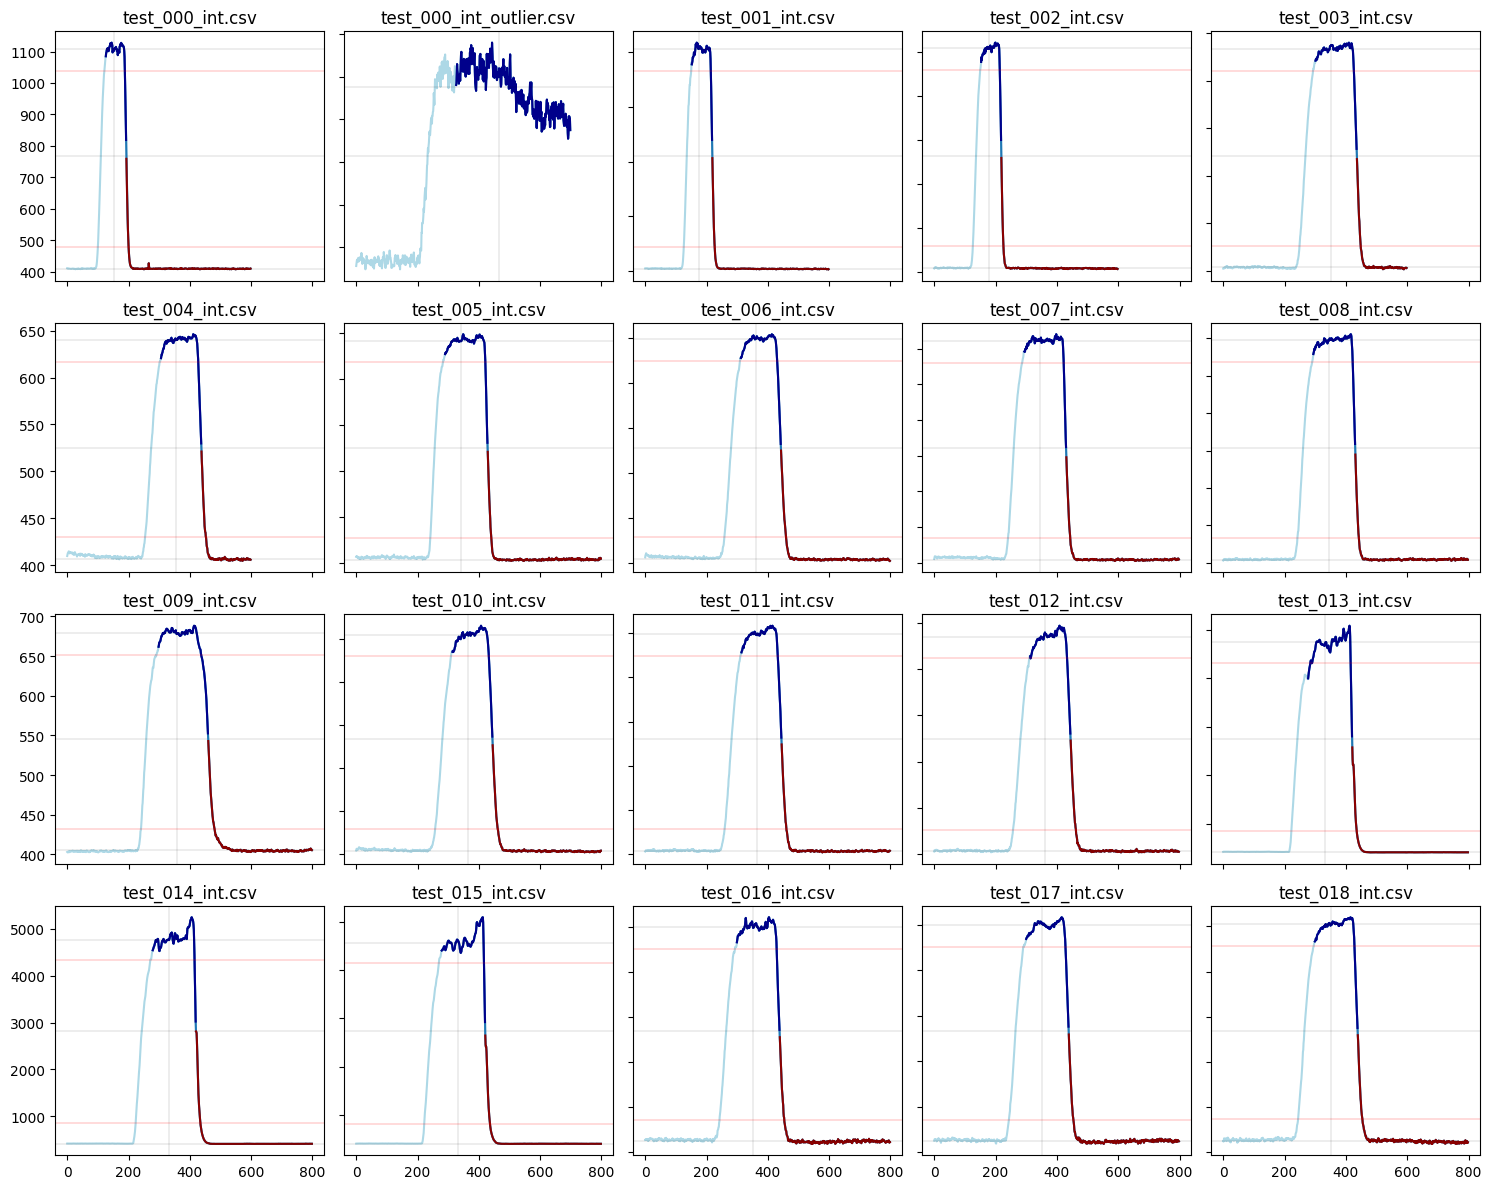

In [144]:
dir = r"C:\Users\rkiselev\Desktop\ladjflasd"
lkw = dict(color="k", lw=0.1)
lkwr = dict(color="r", lw=0.2)

N = 20# len(listdir(dir))
ncol = 5
nrow = (N-1) // ncol + 1
fig, axs = plt.subplots(nrow, ncol, figsize=(15,3*nrow), sharey=False, sharex=True)
for i in range(N):
    col = i % ncol
    row = i // ncol
    fn = listdir(dir)[i]
    df = pd.read_csv(path.join(dir, fn))
    ax = axs[row, col]
    ax.plot(df["Cy3"], label="Cy3", color="lightblue")
    ax.set_title(fn)
    ax.label_outer()

# Analysis
    int_np = df["Cy3"].to_numpy()
    half_max = 0.5 * (int_np.min() + int_np.max())
    ax.axhline(half_max, **lkw)
    peak_idx = np.where(int_np > half_max)[0]
    peak_margin = int(np.quantile(peak_idx, 0.2))
    ax.axvline(peak_idx.mean(), **lkw)

    front = df.iloc[peak_margin:]   # back = df.iloc[peak_margin:]  and peak_margin = int(np.quantile(peak_idx, 0.2))
    ax.plot(front.index, front["Cy3"])
    front_low = front[front['Cy3'] <= half_max]
    front_high = front[front['Cy3'] > half_max]
    ax.plot(front_high.index, front_high['Cy3'], color="darkblue")
    ax.plot(front_low.index, front_low['Cy3'], color="darkred")
    low = np.median(front_low['Cy3'])
    high = np.median(front_high['Cy3'])
    ten_p = 0.1 * (high - low)
    t_low, t_high = low+ten_p, high-ten_p
    [ax.axhline(i, **lkw) for i in [low, high]]
    [ax.axhline(i, **lkwr) for i in [t_low, t_high]];
fig.tight_layout()

    # Now smooth with savgol and then find intersection with t_low and t_high


In [190]:
from PIL import Image
from PIL.TiffTags import TAGS

#fn = r'D:\2023-06 injection test data\test_001.tif'
fn = r'D:\2023-06 injection test data\bead_align000.tif'
img = Image.open(fn)
    #meta_dict = {TAGS[key] : img.tag[key] for key in img.tag.iterkeys()}

In [191]:
a = img.tag.to_v2()

In [192]:
print([v for k, v in a.items() if k == 270][0])

FlashGordon=1.2
hardware=
binning=2x2
frameTime=0.100000
exposureTime=0.100000
channel1.name=Cy3
channel1.wavelength=532
channel1.photonsPerCount=0.210000
channel2.name=Cy5
channel2.wavelength=640
channel2.photonsPerCount=0.210000
channel3.name=Cy7
channel3.wavelength=721
channel3.photonsPerCount=0.210000
fieldArrangement=[1,2;0,3]
laser1.wavelength=532
laser1.dutyCycle=1.000000
laser1.framesActive=1:100
StageX=-965.10
StageY=0.00 


In [188]:
n = lambda x: getattr(x, 'name') if x else None
[(k, n(tt.TAGS_V2.get(k)), v) for k, v in a.items()]

[(256, 'ImageWidth', 2304),
 (257, 'ImageLength', 184),
 (258, 'BitsPerSample', (16,)),
 (259, 'Compression', 1),
 (262, 'PhotometricInterpretation', 1),
 (270,
  'ImageDescription',
  'FlashGordon=1.2\nhardware=\nbinning=2x2\nframeTime=0.002000\nexposureTime=0.002000\nchannel1.name=Cy3\nchannel1.wavelength=532\nchannel1.photonsPerCount=0.210000\nchannel2.name=Cy5\nchannel2.wavelength=640\nchannel2.photonsPerCount=0.210000\nfieldArrangement=[1,2]\nStageX=-807.00\nStageY=0.00\npower_mW=3117.1\x00'),
 (273, 'StripOffsets', (9846784,)),
 (278, 'RowsPerStrip', 184),
 (279, 'StripByteCounts', (847872,)),
 (33434, None, 0.002),
 (282, 'XResolution', 92310.53263177328),
 (283, 'YResolution', 92310.53263177328),
 (296, 'ResolutionUnit', 3)]

In [170]:
import PIL.TiffTags as tt